# Inspecting power spectra

We describe how to load, display, and interpret the Planck CIB auto and cross power spectra from Lenz, Doré, Lagache (2019).

In [1]:
# %load /Users/dlenz/.jupyter/startup.py
# Standard magic commands
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

import healpy as hp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Adjust this as needed
datapath = Path('../dataverse_files')

# CIB auto power spectra

We used [pandas](https://pandas.pydata.org/) to create the DataFrame objects and save the information to disk. Consequently, it is easiest to also read them that way.

In [3]:
df_cib_auto = pd.read_csv(datapath.joinpath('Cl_CIB_T1T2.csv'), comment='#')

The DataFrame contains the binned power spectra for all frequency combinations, as well as the bin centers. The binning scheme is linear in $\ell$, with 64 $\ell$ modes per bin.

In [4]:
df_cib_auto.head(5)

,ell,353x545,353x857,545x857,353x353,545x545,857x857,d353x545,d353x857,d545x857,d353x353,d545x545,d857x857
0,33.5,24888.152064,47794.247983,168033.328798,8753.191022,79173.416984,431070.374969,2673.274062,5685.932582,16427.348687,949.114359,7630.658933,36349.160890
1,97.5,31759.790163,61502.011204,192169.517581,11253.026109,94297.570883,442313.488813,1436.195351,2840.040707,8023.579074,522.223864,4001.008780,16460.784270
2,161.5,21360.538992,40523.492931,122037.794903,7538.280544,62011.390371,264039.812655,723.402563,1406.376460,3918.025970,267.344915,1985.911947,7913.212630
3,225.5,16275.187344,29832.040114,90353.017550,5810.410435,47372.669763,188148.811770,447.365647,858.970951,2367.468079,167.066261,1215.595573,4718.780889
4,289.5,12706.982042,22605.805409,66722.570005,4602.249479,36103.003912,135938.035389,296.838809,560.952082,1522.268657,112.743142,793.879764,2991.806986


Text(0.5, 1.0, '353 x 545')

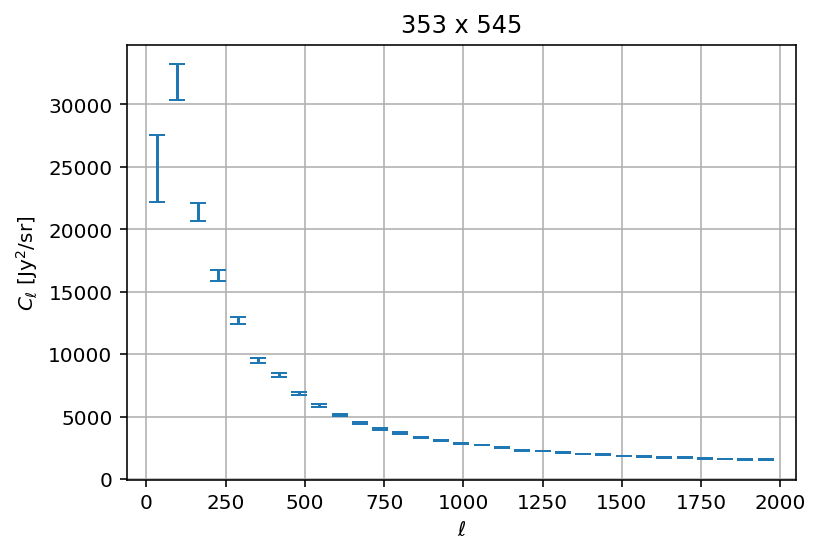

In [5]:
plt.errorbar(
    df_cib_auto['ell'],
    df_cib_auto['353x545'],
    yerr=df_cib_auto['d353x545'],
    ls="None",
    capsize=4)
# plt.semilogy()
plt.grid()

plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell\ [\rm Jy^2/sr]$')
plt.title('353 x 545')

# CIB x CMB lensing

The cross power spectrum of the CIB and the CMB lensing is available for all sky cuts, and contains the bin centers, the binned $C_{\ell$, and the respective error terms. Units are Jy.

In [7]:
df_cibXkappa = pd.read_csv(
    datapath.joinpath('545/2.5e+20_gp20/CIBxKappa_powerspectra.csv'), comment='#')

In [8]:
df_cibXkappa.head()

,ell,Cl,dCl
0,33.5,0.028025,0.012653
1,97.5,0.083314,0.006103
2,161.5,0.056417,0.003684
3,225.5,0.043002,0.002830
4,289.5,0.036609,0.002332


Text(0.5, 1.0, 'CIB x CMB lensing')

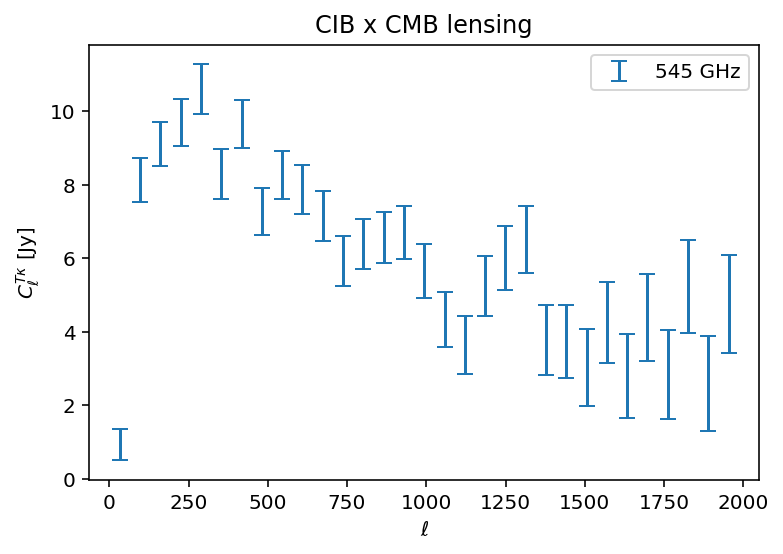

In [9]:
freqs = ['545']

for freq in freqs:
    df = pd.read_csv(
        datapath.joinpath(f'{freq}/2.5e+20_gp20/CIBxKappa_powerspectra.csv'), comment='#')
    
    plt.errorbar(
        df['ell'],
        df['ell']*df['Cl'],
        yerr=df['ell']*df['dCl'],
        linestyle='None',
        capsize=4,
        label=f"{freq} GHz",
    )
    plt.legend()
    
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C_\ell^{T\kappa}\ [\rm Jy]$')
plt.title('CIB x CMB lensing')